In [1]:
# to setup environment
!pip install tensorflow

In [2]:
#load the dataset
from tensorflow.keras.datasets import fashion_mnist
# as the dataset is already pre-split by keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# "load dataset and spilt it into training images + labels, and test images + labels."
# Note: using train-test split wll create imbalance

---

# Reshaping the images from 2D to 1D, for ANN input.

In [4]:
# actual shape
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# conversion from 2D to 1D
x_train= x_train.reshape(x_train.shape[0], 28*28)
#0 itself used to get no.of images itself, other dimensions will get multiply. 

In [7]:
# recheck the shape
x_train.shape

(60000, 784)

In [8]:
x_test= x_test.reshape(x_test.shape[0], -1)
# -1 also represents the 28*28 means keep the [0] and then flatten everything after that

In [9]:
x_test.shape

(10000, 784)

---

 # Normalize the pixel values

In [10]:
# to get the min. and max. pixel range
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [11]:
# check the data type
x_train.dtype

dtype('uint8')

In [12]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
y_train[0]

np.uint8(9)

In [14]:
#unit8 is an 8-bit unsigned integer data type that stores values from 0 to 255

 as unit8 cant decimal values, and ANN model works on floating point numbers

In [15]:
x_train= x_train.astype("float32")/255
# float32 is fast to compute
x_test= x_test.astype("float32")/255

In [16]:
# recheck
x_train.min(), x_train.max()

(np.float32(0.0), np.float32(1.0))

---

# One-Hot Encoding for target labels

In [17]:
# conversion into category, utilizing keras utility tools
from tensorflow.keras.utils import to_categorical

y_train= to_categorical(y_train, 10)

y_test= to_categorical(y_test, 10)

In [18]:
# the model outputs 10 probability values (one for each class)

---

# Designing the ANN Architecture

In [19]:
# modeling
# required to update the tensorflow

In [20]:
!pip install matplotlib

In [21]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model= Sequential([
    # build the model layer by layer in a strainght line i.e. a sequence
    Dense(128, activation='relu', input_shape= (784,)),
    # 1st hidden layer with 128 neurons
    Dropout(0.3),
    # this randomly turns 30% of neurons OFF during traing
    Dense(64, activation='relu'),
    # 2nd hidden layer with 64 neurons
    Dropout(0.3),
    # another dropout layer for regularization
    Dense(10, activation='softmax')
    # output layer with 10 neurons (for 10 classes)
])

C:\Users\Pawanpreet Kaur\anaconda3\envs\Tensor_Flow\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Note: in keras, the input layer neurons are automatically created from the input_shape we provide

In [24]:
# input_shape=(784), is 1D shape with 784 values
# thus the input layer has 784 neurons 1 for each pixel

---

# Optimization

In [25]:
model.compile(optimizer='adam',
# adam is optimization algorithm that autometically adjust the leraning rate during training.
              loss='categorical_crossentropy',
# loss function used for multi-class classification when labels are one-hot encoded.
              metrics=['accuracy'])
# show the model's accuracy during training and validation after each epoch.

In [26]:
# shape of the training data
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [27]:
# model validation
model.fit(x_train, y_train, validation_split=0.2)

# 20% for the training data and 80% for the validation for actual training

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7632 - loss: 0.6675 - val_accuracy: 0.8343 - val_loss: 0.4490


---

In [28]:
# train the model and evaluate it during its training
# here we will train the ANN model and stores the entire training inforamtion inside a variable called history
history= model.fit(x_train, y_train, validation_split=0.2, 
                   epochs=20, 
                   # epoch=20: the model go through entire training data 20 times
                   batch_size=64, 
                   # the model train on 64 images at a time before updating weights
                   verbose=1)
                  # shows progress bar + training details

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8370 - loss: 0.4611 - val_accuracy: 0.8549 - val_loss: 0.3983
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8455 - loss: 0.4329 - val_accuracy: 0.8628 - val_loss: 0.3747
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8525 - loss: 0.4125 - val_accuracy: 0.8637 - val_loss: 0.3649
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8578 - loss: 0.3950 - val_accuracy: 0.8699 - val_loss: 0.3632
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8622 - loss: 0.3793 - val_accuracy: 0.8696 - val_loss: 0.3540
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8652 - loss: 0.3708 - val_accuracy: 0.8756 - val_loss: 0.3454
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8682 - loss: 0.3625 - val_accuracy: 0.8786 - val_loss: 0.3417
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8718 - loss: 0.3539 - val_a

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
# loss: training error of the model on the training data 
# accuracy: training accuracy of the model on the training data
# val_loss: validation error of the model on the training data
# val_accuracy: validation accuracy of the model on the training data

In [31]:
# an important parameter to determine the model performance is validation loss(val_loss)
history.history["val_loss"]

[0.3983023762702942,
 0.37465396523475647,
 0.36485859751701355,
 0.36323991417884827,
 0.35397034883499146,
 0.34544262290000916,
 0.341726690530777,
 0.3390983045101166,
 0.33405801653862,
 0.3260651230812073,
 0.34390026330947876,
 0.3265165686607361,
 0.3277119994163513,
 0.33003008365631104,
 0.31893762946128845,
 0.3224313259124756,
 0.3318144977092743,
 0.34052905440330505,
 0.3149757981300354,
 0.32619738578796387]

---

In [32]:
# we will utilize EarlyStoping method to prevent the model from overfitting
from tensorflow.keras.callbacks import EarlyStopping
# stop training automatically if the validation loss does not improve for 3 consecutive epoch
early_stopping= EarlyStopping(monitor='val_loss', patience=3)

---

# Model Evaluation 

In [33]:
# run the model on the test dataset and store the resulting error in test_loss and performance score in test_accuracy

In [34]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8814 - loss: 0.3513


In [35]:
# accuracy: 0.8775, the model correctly predicted 87.75% of the test image

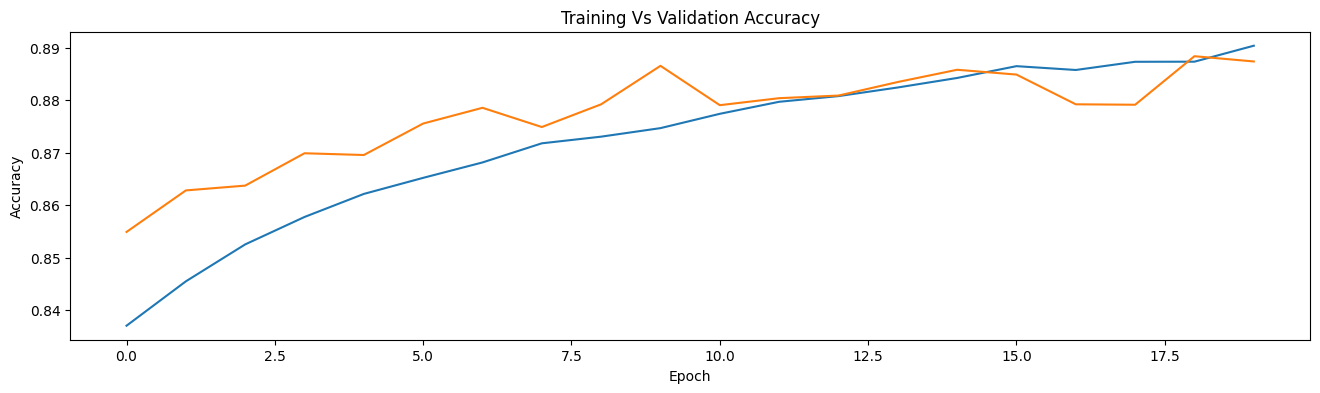

In [36]:
plt.figure(figsize=(16, 4))
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

---

# Missclassified Images/Category

In [37]:
!pip install seaborn

In [38]:
# generate predictions
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [39]:
# view predictions
y_pred[:1]

array([[1.2638579e-08, 1.0724895e-08, 2.1215865e-09, 2.1352861e-07,
        9.5718518e-09, 1.7200388e-02, 7.1997350e-09, 2.5336387e-02,
        5.0932211e-08, 9.5746285e-01]], dtype=float32)

In [40]:
# now convert predicted probalilities into final predicted class numbers (0-9) by selecting the highest vaule
y_pred_classes= y_pred.argmax(axis=1)
# argmax: arg= argument, max= maximum

In [41]:
y_pred_classes[:1]

array([9])

In [42]:
# similarly
y_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [43]:
# convert the one hot encoded true labels back into classes numbers(0-9)
y_true= y_test.argmax(axis=1)

In [44]:
y_true[:1]

array([9])

In [45]:
# define class labels
class_labels= ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# as the fashion MNIST does not provides the class names automatically

In [46]:
!pip install scikit-learn

In [47]:
# to plot the confusion matrix
from sklearn.metrics import confusion_matrix

In [48]:
import seaborn as sns

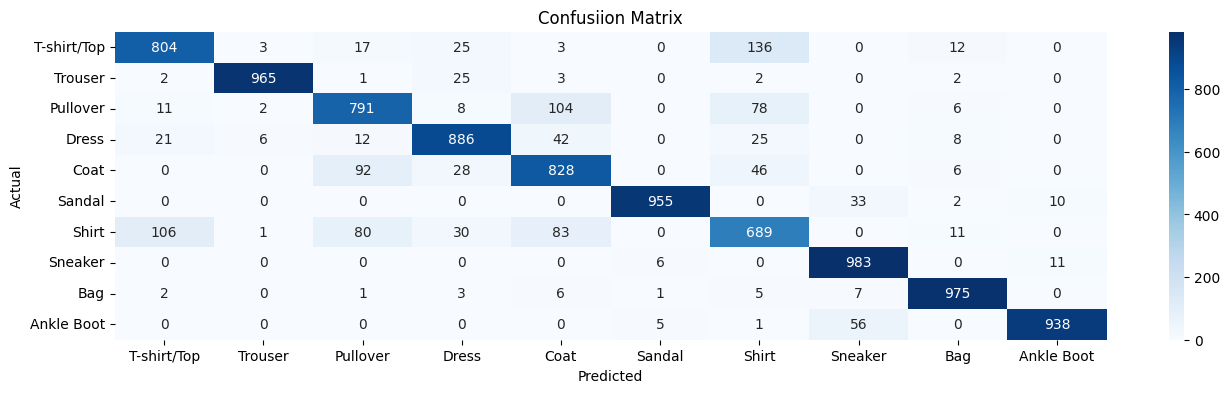

In [49]:
cm= confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(16,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusiion Matrix')
plt.show()

In [50]:
# T-shirt/top vs. shirt or pullover vs Coat are offten confused due to similar shapes/texture
# Confusion matrix can help identify these classifications.

---

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.88      0.89      0.88      1000
           4       0.77      0.83      0.80      1000
           5       0.99      0.95      0.97      1000
           6       0.70      0.69      0.70      1000
           7       0.91      0.98      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



---

In [53]:
# Plot first 10 predictions with Images

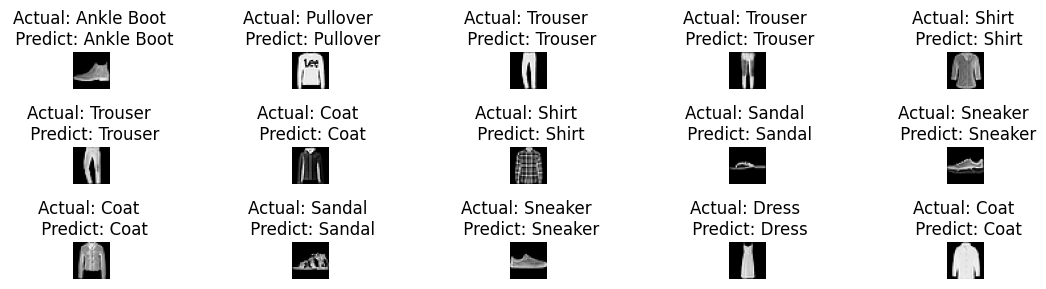

In [58]:
plt.figure(figsize=(12, 3))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='grey')
    plt.title(f'Actual: {class_labels[y_true[i]]} \n Predict: {class_labels[y_pred_classes[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

---

In [55]:
model.save("fashion_mnist_ann.keras")

In [56]:
(x_train, y_train), (_, _)= fashion_mnist.load_data()

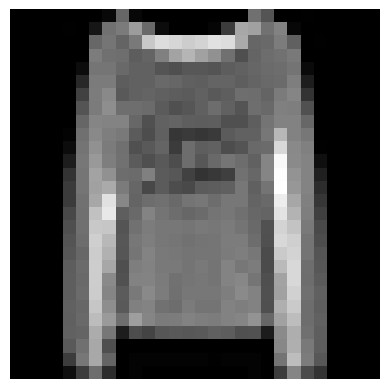

In [61]:
plt.imshow(x_train[440], cmap='gray')
plt.axis('off')
plt.savefig("sample_fasion_mnist440.png")